In [1]:
pip install requests pandas matplotlib seaborn

In [3]:
# Importing necessary libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Define the base URL for the API
api_base_url = "https://www.anapioficeandfire.com/api/"

In [5]:
# Define a function to fetch data from the API
def fetch_data(endpoint, params=None):
    response = requests.get(api_base_url + endpoint, params=params)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to retrieve data from {endpoint}: {response.status_code}")
        return []

In [6]:
# Fetch data about characters
characters_data = fetch_data('characters', params={'pageSize': 50})

# Convert the data to a pandas DataFrame
df = pd.DataFrame(characters_data)

# Display the first few rows of the dataframe
df.head()

,url,name,gender,culture,born,died,titles,aliases,father,mother,spouse,allegiances,books,povBooks,tvSeries,playedBy
0,https://www.anapioficeandfire.com/api/characte...,,Female,Braavosi,,,[],[The Daughter of the Dusk],,,,[],[https://www.anapioficeandfire.com/api/books/5],[],[],[]
1,https://www.anapioficeandfire.com/api/characte...,Walder,Male,,,,[],[Hodor],,,,[https://www.anapioficeandfire.com/api/houses/...,[https://www.anapioficeandfire.com/api/books/1...,[],"[Season 1, Season 2, Season 3, Season 4, Seaso...",[Kristian Nairn]
2,https://www.anapioficeandfire.com/api/characte...,,Male,,,,[],[Lamprey],,,,[https://www.anapioficeandfire.com/api/houses/15],[https://www.anapioficeandfire.com/api/books/3],[],[],[]
3,https://www.anapioficeandfire.com/api/characte...,,Female,Braavosi,,,[],[The Merling Queen],,,,[],[https://www.anapioficeandfire.com/api/books/5...,[],[],[]
4,https://www.anapioficeandfire.com/api/characte...,,Male,,,,[],[Old Crackbones],,,,[],[https://www.anapioficeandfire.com/api/books/5],[],[],[]


In [7]:
# Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   url          50 non-null     object
 1   name         50 non-null     object
 2   gender       50 non-null     object
 3   culture      50 non-null     object
 4   born         50 non-null     object
 5   died         50 non-null     object
 6   titles       50 non-null     object
 7   aliases      50 non-null     object
 8   father       50 non-null     object
 9   mother       50 non-null     object
 10  spouse       50 non-null     object
 11  allegiances  50 non-null     object
 12  books        50 non-null     object
 13  povBooks     50 non-null     object
 14  tvSeries     50 non-null     object
 15  playedBy     50 non-null     object
dtypes: object(16)
memory usage: 6.4+ KB


In [8]:
# Filter the data to include only named characters
df_named = df[df['name'] != '']

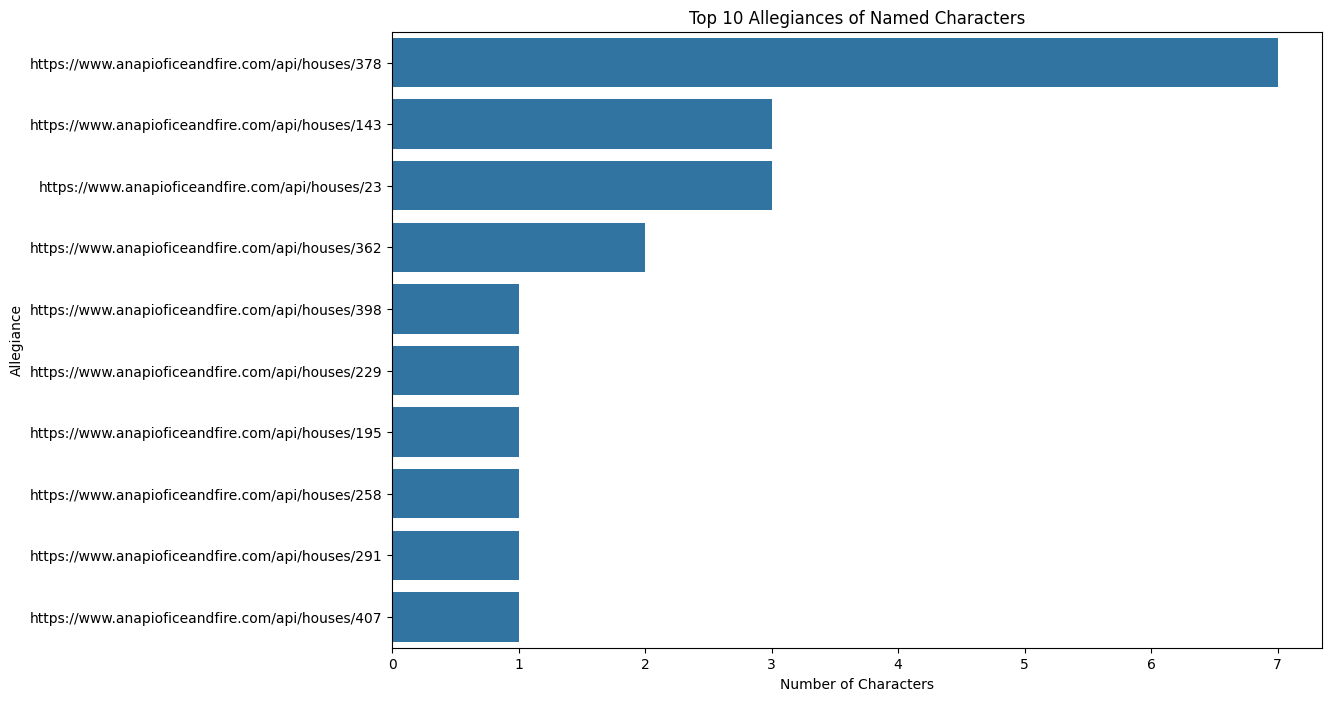

In [9]:
# Plotting the distribution of character allegiances
plt.figure(figsize=(12, 8))
allegiances = df_named['allegiances'].explode().value_counts().head(10)
sns.barplot(x=allegiances.values, y=allegiances.index)
plt.title('Top 10 Allegiances of Named Characters')
plt.xlabel('Number of Characters')
plt.ylabel('Allegiance')
plt.show()

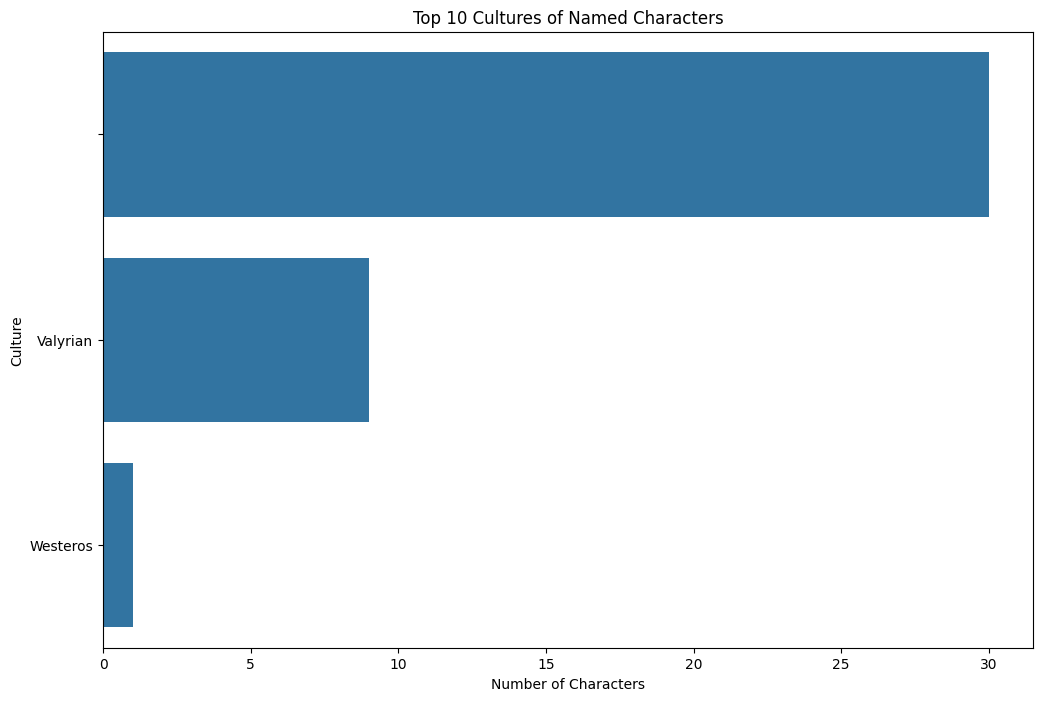

In [10]:
# Plotting the number of characters by culture
plt.figure(figsize=(12, 8))
cultures = df_named['culture'].value_counts().head(10)
sns.barplot(x=cultures.values, y=cultures.index)
plt.title('Top 10 Cultures of Named Characters')
plt.xlabel('Number of Characters')
plt.ylabel('Culture')
plt.show()

<ipython-input-11-d83a8223b810>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_named['num_books'] = df_named['books'].apply(len)


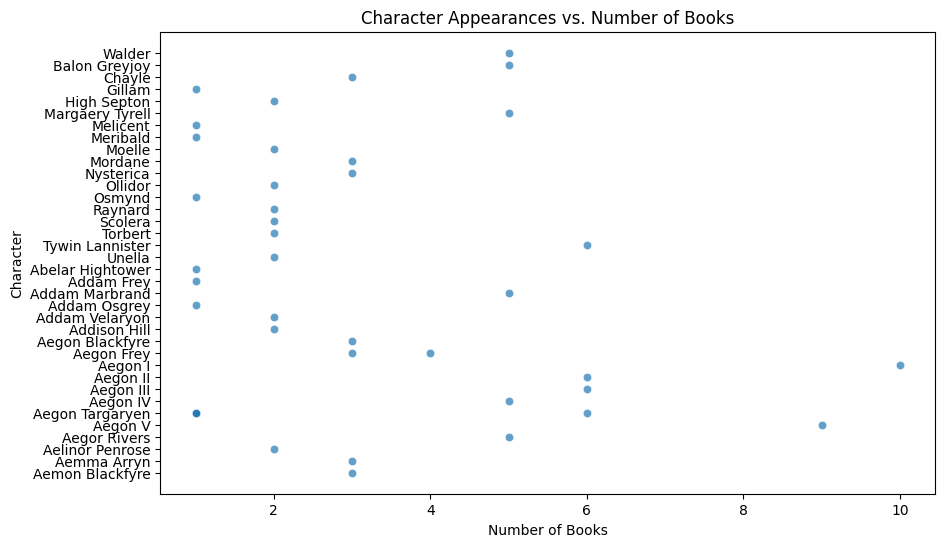

In [11]:
# Scatter plot for character appearances vs. number of books they appear in
plt.figure(figsize=(10, 6))
df_named['num_books'] = df_named['books'].apply(len)
sns.scatterplot(x='num_books', y='name', data=df_named, alpha=0.7)
plt.title('Character Appearances vs. Number of Books')
plt.xlabel('Number of Books')
plt.ylabel('Character')
plt.show()

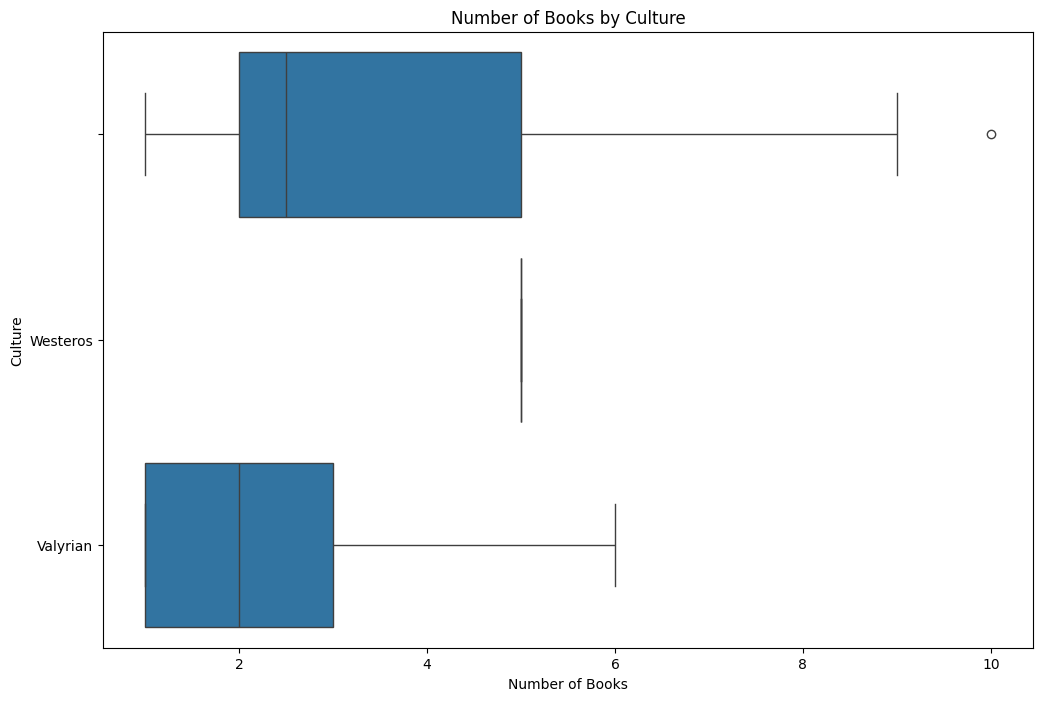

In [12]:
# Boxplot for number of books by culture
plt.figure(figsize=(12, 8))
sns.boxplot(x='num_books', y='culture', data=df_named[df_named['culture'].isin(cultures.index)])
plt.title('Number of Books by Culture')
plt.xlabel('Number of Books')
plt.ylabel('Culture')
plt.show()

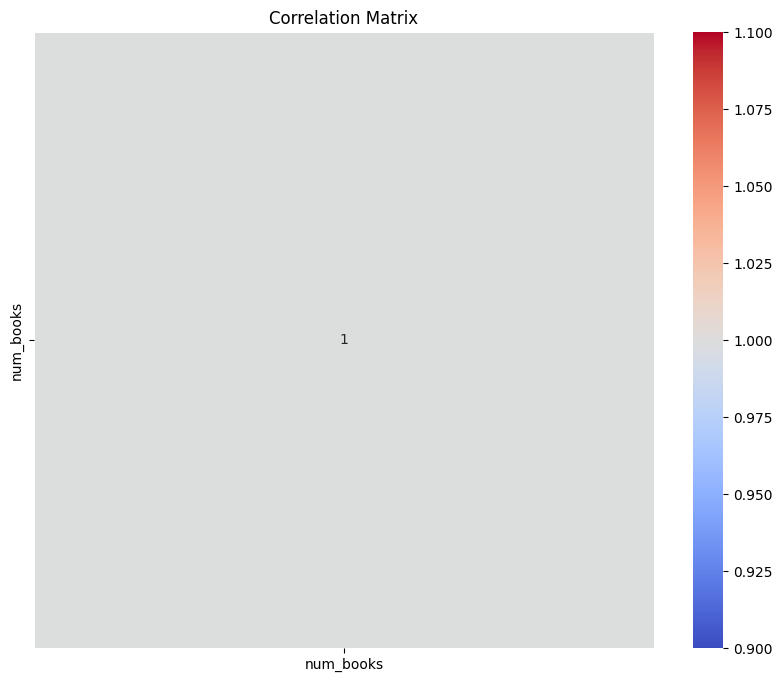

In [13]:
# Heatmap for correlation matrix (only numerical columns)
plt.figure(figsize=(10, 8))
numerical_cols = df_named.select_dtypes(include='number').columns
correlation_matrix = df_named[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()